# EDA 2: Map data

https://nddoornekamp.medium.com/plotting-strava-data-with-python-7aaf0cf0a9c3

https://developers.google.com/maps/documentation/utilities/polylinealgorithm

In [29]:
import pandas as pd
import polyline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_name = "../Data/Download_csv_11July.csv"
data = pd.read_csv(data_name)
data.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,device_watts,kilojoules,average_temp,max_watts,weighted_average_watts
0,2,Salinas wander,4519.3,3848,4165,12.9,Walk,Walk,15054795828,2025-07-09T07:16:58Z,...,a15054795828,onalFsnnGC?ROTe@H?RWPEXAd@IJK\APOHOD?VYNKDG?OP...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lunch Swim,1750.0,2904,4333,0.0,Swim,Swim,15033253961,2025-07-07T09:02:42Z,...,a15033253961,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afternoon Swim,1000.0,1605,1750,0.0,Swim,Swim,15024224231,2025-07-06T11:01:33Z,...,a15024224231,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Gym warmup,3000.0,1185,1197,0.0,Run,Run,14981859301,2025-07-02T09:35:57Z,...,a14981859301,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Coffee walk,4056.2,3168,3987,39.3,Walk,Walk,14915642372,2025-06-24T12:27:42Z,...,a14915642372,czwxHpuAEfBMv@Ct@BXIXCp@Kz@EPK@KJKASIc@[YKc@CI...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ireland = data[data['distance'] == data['distance'].max()]
print(ireland.head())

     resource_state              name  distance  moving_time  elapsed_time  \
296               2  Dublin to Galway  226570.0        35823         49143   

     total_elevation_gain  type sport_type          id            start_date  \
296                 662.0  Ride       Ride  9628303929  2023-08-11T05:22:40Z   

     ...       map.id                               map.summary_polyline  \
296  ...  a9628303929  ebsdIh_de@tAvf@b\}DrItl@lb@~I`t@cJ~AdfAiLndBe_...   

     map.resource_state  workout_type  average_watts  device_watts  \
296                   2          10.0          104.3         False   

     kilojoules  average_temp  max_watts  weighted_average_watts  
296      3736.4          18.0        NaN                     NaN  

[1 rows x 60 columns]


In [4]:
# Example activity
salinas = data.iloc[0]
salinas_pl = salinas['map.summary_polyline']
print(salinas_pl)

ireland = ireland.iloc[0]
ireland_pl = ireland['map.summary_polyline']
print(ireland_pl)

onalFsnnGC?ROTe@H?RWPEXAd@IJK\APOHOD?VYNKDG?OPq@NWZYDKRiAJWBSLi@VwBX{@X]VORINMDWVi@HUXk@DYBEPWRa@h@w@JILUVo@P]XOTWLU@G?IPm@Fu@l@eAROR]XaAJSNS\YJELARi@DWHGJC@HIi@?OFa@Na@d@_AXSbBwBXm@FWFSf@u@TXFD@??OFKC@AKTgAHAP?XIBGFQEQCw@FONGPs@DCRFB?LIDMAO@OGUKQE[`@ONUPETAFKEQ_@o@P}@^k@^c@T_@l@o@PMJSv@s@JT\\BTFJNTTPPr@FJISCYLw@EIMAGCAG@QBMB?Qa@IKIACGCWBg@TYTSlAc@\ULOf@Yd@k@p@IXG@HKXB^I\I?QLIPK^G?GEK[MO_@UQFOPWNkAd@_@XKBaAz@S^Sh@e@r@_@\g@x@UP_@f@Qb@CVe@`AqAxAsAzBkBbCWTm@`@URGPWb@Ul@i@x@GPOVq@vBi@dAITaAx@SHo@b@OCEEC@MP_@VITKLg@NMNc@V_@r@[dAEHMHUh@IDa@v@[`@G\MVYDw@EYDOLs@x@]p@ENc@r@OL@ACLe@p@u@rBU`@IH[t@o@nBOpAMd@OZDp@Iv@Ah@~@b@FDNf@Jj@?JVZAXBD]RQBQAQKWAQ?AH
ebsdIh_de@tAvf@b\}DrItl@lb@~I`t@cJ~AdfAiLndBe_@j{Abt@d}LyLn~M{S`Bi@wh@qh@Ssc@_^kJpl@eNiCke@d`ByFh\d@|X_I`C_QtbAgJj@rDjd@{Sp[sK`g@kWffB|A`[oMz[uLbxAqUprE|FlvAlMf_@TfZc`@~uC}qAb`E_\lwAsU|\{Jp`@uZjUoj@phBk}@vtEoRvsBt]`xCtXrb@`Mjx@uKtdCnNdfBxMlb@|E_V}ClWvK|`@{Btl@jDz`@iQvv@pGpz@sSbfAoGp~@jApq@cg@tfAwXvPwQeEqc@ng@qaA~wDmk@`_Asa@`Tmt@hoBcOr_BsGz|BoYzdAgAd

In [5]:
# Filter to just the camino
# Aim: plot this across a map of Spain

# TODO currently with oldest at the top, could look to reverse this

foot = data[data["type"].isin(["Walk", "Hike"])]
foot['start_date_local_dt'] = pd.to_datetime(foot['start_date_local'])
foot['date'] = foot['start_date_local_dt'].dt.date
camino = foot[(foot['date']>datetime.date(2025,5,11)) & (foot['date']<datetime.date(2025,6,24))]
camino = camino[camino['name'] != "Muxía wander"]
print(camino.shape)

camino_id_list = camino.id.unique()
print(camino_id_list)

(38, 62)
[14877011643 14870920145 14861030053 14849579477 14803462356 14796351461
 14786687638 14776901976 14766034431 14755068340 14744229326 14734249260
 14724314753 14713500324 14704041428 14694815840 14683155268 14670007468
 14661422632 14650423644 14640920271 14629459586 14620370950 14609837454
 14597597196 14590747726 14579432434 14570077625 14559864438 14551449407
 14539645418 14529167414 14518218617 14508430079 14498215466 14488118449
 14478936819 14456053386]


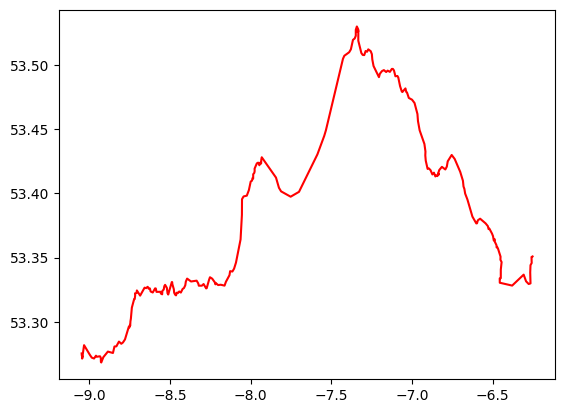

In [6]:
# Code from the tutorial
import matplotlib.pyplot as plt

# summary_polyline = "ij_}Hyjd^dB_Gp@aAn@[F[{BwQpA?p@v@rCQf@m@_@iTSaAe\\cEWVKt@yANs@jCkAfB_JhIdEpP|ApD|BfDl@`DcEvCwEbCcHtKiGnLmKnOcClF{HxLoBrBgG~DmAnBy@pCYxBi@xIHlBu@xH{@tPu@fRLpIS~Eo@lC_HtOuJ|LwOrH{FrH}BdEoChBeBt@{HpBwBpBqA|Ba@K{DeGkKnQc@WkEwGsG~Aj@rBjBjWOhA}AtEc@`Ge\\rZyCbH{@|@Ij@r@hA|BxURf@E`@qJzQy_@fz@uGtG{Cy@}GxAyCrCqAfC{AfHmC|SQtEdAxHpBvGv@`EDbFm@pDo@r@sAl@qGc@}ALgJzIkGhNcDzOkBvHsCpD{EvCaGfBqWtC_FpB_F`FeOdV_HtEsJL{JeCqFaC}D}DkH{FyRiD_B}@cC`@{CyAeC`@}RrK_ErAcDnBuFJmBk@sA{@kAoBgD}Iw@_DK}DnAcBUsCTcIIsDkAkGu@eAiCiGyOoSoE{DqImDqE|@aG{AaH}CwDaD_DmFkCgMgB_GeEyFkV_LgE_AaI{BuARoDrBy@z@_BfDSBqCkLoBwFmBsBmDoAgCIkCxB}CtAsI?iFq@{B^cAYsAoBIcDcBkO}A{BuKcd@{Sq`AmAkH_@aFKuN^gFxAyHtPyj@fBcE|E}OzWk}@~CiHXgE`BoIv@wGj]_jE`AgBtAd@j_@j^bRdNn@|Ab@lFp@rAvJ|GxBr@^l@\\ANm@M_FJgu@l@mI`AsHfEeU`BsEjFcKxKoM|FwE~CcB`Cl@|DfH|CjGrInS`EzLnEjSrNb~@hHjc@jBnRzFv~@fCjf@jAn\\N|Ge@r}@L|Fj@t@tAXxPhBdeAkG`Du@M{DmHog@u@gDDiA`^cSdWmP|[e\\fDaE|HaGxB{D|FeO?e@_@u@sZue@YcBxOyl@nFiVtGqVnTir@r@gBd@e@VuCxCkJIgEfGyiAdAwZe@w@kQ{LYy@zDyWvDoRd@_A~zAfq@|q@l_@l@FnBaBfBe@fVvL`AxAt@tB^kEnBKlBf@~AhAr@`Av@zBtEeBfAyElAg@hGnA`B|@jBnBp@`AXbAAzDr@fCC`D`@lG\\NXfC`C`Fl@rBtGnc@Et@cA`Bn@`CyApDxBzD~@lCvCvBtEj]xBpKGp@aFnJ?b@~GpXdBdE~BnD|AxHxC~Dr@ItEdAzB_@"
# summary_plotline = salinas_pl

coordinates = polyline.decode(ireland_pl)

ride_longitudes = [coordinate[1] for coordinate in coordinates]
ride_latitudes = [coordinate[0] for coordinate in coordinates]

plt.plot(ride_longitudes, ride_latitudes, 'r-', alpha=1)
plt.show()

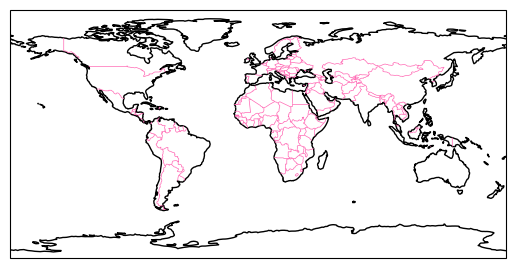

In [7]:
# Adding satelite imagery as background - code from tutorial
from cartopy import crs as ccrs, feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='hotpink')
# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

plt.show()

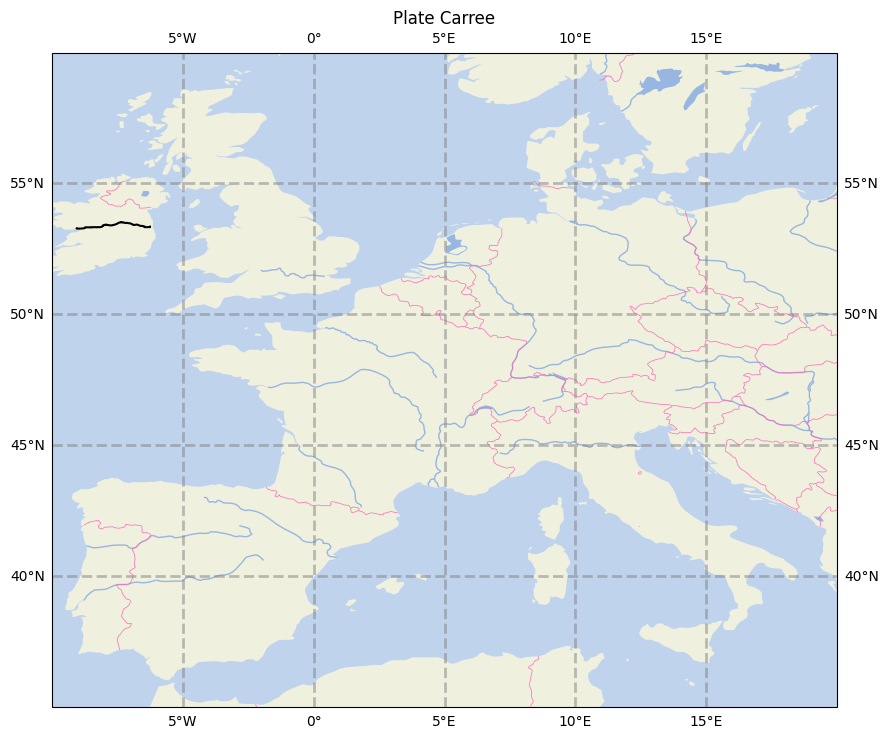

In [8]:
# Tutorial to plot specific lat long regions, filtering for USA
# https://foundations.projectpythia.org/core/cartopy/cartopy.html

projPC = ccrs.PlateCarree()
latN = 60
latS = 35
lonW = -10
lonE = 20
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)

ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND, alpha = 0.9)
ax.add_feature(cfeature.OCEAN, alpha = 0.6)

# ax.coastlines(resolution=res, color='black')
# ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='blue')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='hotpink')

plt.plot(ride_longitudes, ride_latitudes, 'r-', alpha=1, color="black")

plt.show()

In [9]:
# Turn this into a function to pull out the lat and longs for a cmaino route, and append them on to a list for plotting

def return_lat_long(coords):

    """
    Take a polyline code, decode it into a list of latitude and longitude coordinates
    """

    coordinates = polyline.decode(coords)
    longitudes = [coordinate[1] for coordinate in coordinates]
    latitudes = [coordinate[0] for coordinate in coordinates]

    return longitudes, latitudes

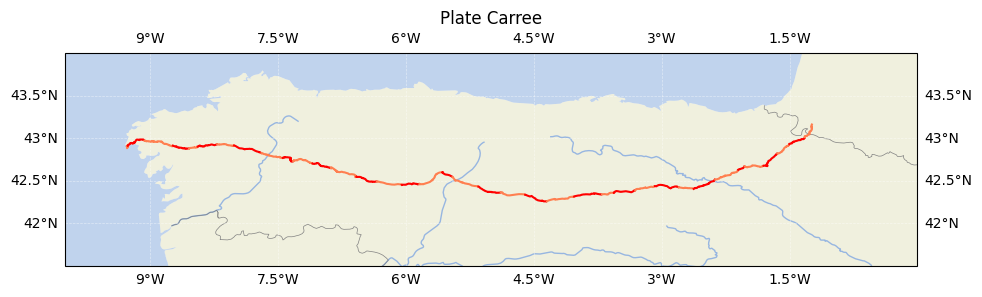

In [23]:
projPC = ccrs.PlateCarree()
latN = 44
latS = 41.5
lonW = -10
lonE = 0
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

fig = plt.figure(figsize=(11, 5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=0.5, color='white', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)

ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND, alpha = 0.9)
ax.add_feature(cfeature.OCEAN, alpha = 0.6)

ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='grey')

counter = 0
for id in camino_id_list:

    coords = camino[camino['id'] == id]['map.summary_polyline'].iloc[0]

    long, lat = return_lat_long(coords)

    if counter % 2 == 0:
        col_to_plot = "coral"
    else:
        col_to_plot = "red"  # deeppink

    plt.plot(long, lat, 'r-', alpha=1, color=col_to_plot)

    counter += 1
    
plt.show()

In [24]:
# Appended list of all lat longs
all_camino_longs = []
all_camino_lats = []

for id in camino_id_list:
    coords = camino[camino['id'] == id]['map.summary_polyline'].iloc[0]
    long, lat = return_lat_long(coords)

    all_camino_longs.extend(long)
    all_camino_lats.extend(lat)


[-9.26263, 42.90718]


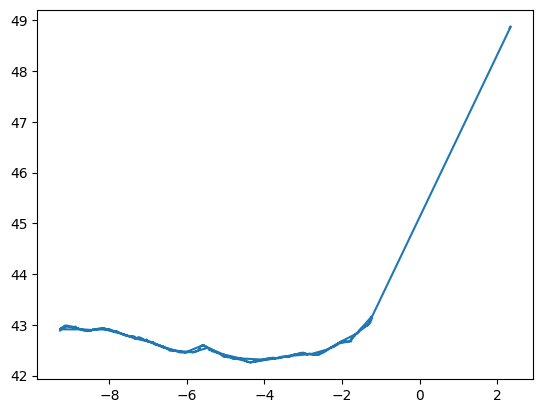

In [26]:
# Return the elevation of a lat long set
sample_pair = [all_camino_longs[0], all_camino_lats[0]]
print(sample_pair)

# https://gis.stackexchange.com/questions/338392/getting-elevation-for-multiple-lat-long-coordinates-in-python 

# Potentially sample my lat long pairs so I'm not sending so many requests
len(all_camino_longs)

plt.plot(all_camino_longs, all_camino_lats)
plt.show()

# Feels like there is a rogue data point here?

### Animation
Something to try and learn and explore

zsh:fg:1: no job control in this shell.


In [32]:
import matplotlib.animation as animation

# Example code
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

<IPython.core.display.Javascript object>

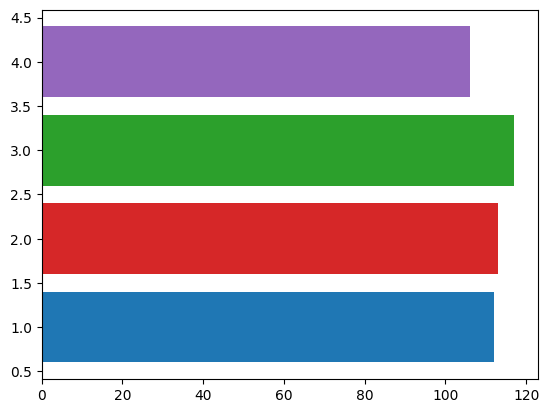

In [31]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
